## why pandas
#### pandas 含有使得数据分析工作变得更快和更简单的高级数据结构和操作工具
#### pandas是基于NumPy来构建的

In [3]:
import pandas as pd
from pandas import Series, DataFrame

## Series 类型说明
#### 这个就是一种类似于一维数组的对象，它是由一组数据以及一组与之相关的数组标签组成（索引）。 仅由一组数据即可产生简单的Series

In [4]:
obj = Series([1,2,3,4,5])
print(obj)
print(obj.values)
print(obj.index)

0    1
1    2
2    3
3    4
4    5
dtype: int64
[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


In [5]:
# 自定义索引
obj = Series(['a','b','c','d','e'], index = [1,2,3,4,5])
print(obj)

1    a
2    b
3    c
4    d
5    e
dtype: object


In [7]:
# use Series as dictionary
data = {'a': 1000, 'b':2000, 'c':3000}
obj = Series(data) # series 的所以就是字典中的key
print(obj)
keys = ['a','c']
obj_1 = Series(data, index = keys)
print(obj_1)

a    1000
b    2000
c    3000
dtype: int64
a    1000
c    3000
dtype: int64


In [9]:
# missing value
data = {'a': 1000, 'b':None, 'c':3000}
obj = Series(data) 
print(obj)

a    1000.0
b       NaN
c    3000.0
dtype: float64


In [12]:
pd.isnull(obj)
obj.isnull()

a    False
b     True
c    False
dtype: bool

In [11]:
pd.notnull(obj)

a     True
b    False
c     True
dtype: bool

In [16]:
data = {'a': 1000, 'b':None, 'c':3000}
obj = Series(data) 
obj.name = 'NameAndNumber'
obj.index.name = 'Name'
print(obj)

Name
a    1000.0
b       NaN
c    3000.0
Name: NameAndNumber, dtype: float64


## DataFrame类型
#### DataFrame是一个表个性的数据结构，它含有一组有序的列。每列可以是不同值的类型，数值，字符型，boolean
#### DataFrame本身有行索引，也有列索引
#### DataFrame 也可以理解成是由Series组成的一个字典

In [18]:
# create a DataFrame
data = {
    'vb':['eat', 'run','stand'],
    'non':['apple','cookie','juice'],
    'other':['is','am','are']
}
df = DataFrame(data)
print(df)
print(df['non'])

      vb     non other
0    eat   apple    is
1    run  cookie    am
2  stand   juice   are
0     apple
1    cookie
2     juice
Name: non, dtype: object


In [22]:
import numpy as np
dates = pd.date_range('20190301',periods = 6)
print(dates)

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06'],
              dtype='datetime64[ns]', freq='D')


In [24]:
df = pd.DataFrame(np.random.rand(6,4), index = dates, columns = list('ABCD'))
print(df)

                   A         B         C         D
2019-03-01  0.457463  0.525232  0.812107  0.492674
2019-03-02  0.959739  0.489709  0.672409  0.613333
2019-03-03  0.524374  0.561504  0.652994  0.104370
2019-03-04  0.943710  0.785952  0.433226  0.881948
2019-03-05  0.984540  0.292614  0.320081  0.314560
2019-03-06  0.602979  0.814907  0.679307  0.016036


In [25]:
df.T

,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06
A,0.457463,0.959739,0.524374,0.943710,0.984540,0.602979
B,0.525232,0.489709,0.561504,0.785952,0.292614,0.814907
C,0.812107,0.672409,0.652994,0.433226,0.320081,0.679307
D,0.492674,0.613333,0.104370,0.881948,0.314560,0.016036


In [26]:
df['20190301':'20190303']

,A,B,C,D
2019-03-01,0.457463,0.525232,0.812107,0.492674
2019-03-02,0.959739,0.489709,0.672409,0.613333
2019-03-03,0.524374,0.561504,0.652994,0.104370


In [28]:
df.loc['20190301':'20190303',['A','B']]

,A,B
2019-03-01,0.457463,0.525232
2019-03-02,0.959739,0.489709
2019-03-03,0.524374,0.561504


In [29]:
df.at[dates[0],'A']

0.4574633178835851

In [ ]:
df.tail(3)

#### DataFrame 构造函数能够接收哪些数据类型
1. 二维numpy array
2. 由数组、列表或者元祖组成的字典
3. 由Series组成的字典
4. 由字典组成的字典
5. 字典或Series的列表
6. 由列表或元祖组成的列表
7. 另一个DataFrame

## Pandas 重新索引 reindex

In [31]:
obj = Series([4.5,9.8,-1.2], index = ['a','b','c'])
print(obj)
job_1 = obj.reindex(['a','b','b','e','f'])
print(job_1)

a    4.5
b    9.8
c   -1.2
dtype: float64
a    4.5
b    9.8
b    9.8
e    NaN
f    NaN
dtype: float64


In [32]:
# fill missing value
obj.reindex(['a','b','b','e','f'], fill_value = 0)

a    4.5
b    9.8
b    9.8
e    0.0
f    0.0
dtype: float64

In [33]:
obj = Series([4.5,9.8,-1.2], index = [0, 2, 4])
o = obj.reindex(range(6), method = 'ffill') #前向值填充
print(obj)
print(o)

0    4.5
2    9.8
4   -1.2
dtype: float64
0    4.5
1    4.5
2    9.8
3    9.8
4   -1.2
5   -1.2
dtype: float64


## 算数运算和数据对齐
#### pandas 的一个重要功能，就是可以对不同索引的对象进行算数运算，在将对象相加时， 如果存在不同的索引时， 则结果的索引就是该索引的并集

In [35]:
d1 = Series([1.3,1.5,2.6,-3.5], index = ['a','b','c','d' ])
d2 = Series([-1.3,-1.5,-2.6,3.9, 9.8], index = ['a','b','c','d','e' ])
d1 + d2

a    0.0
b    0.0
c    0.0
d    0.4
e    NaN
dtype: float64

In [39]:
df1 = DataFrame(np.arange(9).reshape((3,3)), columns = list('abc'), index = [1,2,3])
print(df1)

   a  b  c
1  0  1  2
2  3  4  5
3  6  7  8


In [40]:
df2 = DataFrame(np.arange(12).reshape((4,3)), columns = list('cde'),index = [1,2,3,4])
print(df2)

   c   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11


In [41]:
df1 +df2

,a,b,c,d,e
1,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,8.0,NaN,NaN
3,NaN,NaN,14.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [42]:
df1.add(df2, fill_value = 0)

,a,b,c,d,e
1,0.0,1.0,2.0,1.0,2.0
2,3.0,4.0,8.0,4.0,5.0
3,6.0,7.0,14.0,7.0,8.0
4,NaN,NaN,9.0,10.0,11.0


## DataFrame和Series之间的运算

In [43]:
frame = DataFrame(np.arange(12).reshape(4,3), columns = list('bde'), index = [1,2,3,4])
series = frame.loc[1] #选取frame中索引为1的一行数据
print(frame)
print(series)

   b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
d    1
e    2
Name: 1, dtype: int64


In [44]:
frame - series # 一直向下广播相减

,b,d,e
1,0,0,0
2,3,3,3
3,6,6,6
4,9,9,9


In [49]:
series = Series(range(3), index = list('bef'))
frame + series

,b,d,e,f
1,0.0,NaN,3.0,NaN
2,3.0,NaN,6.0,NaN
3,6.0,NaN,9.0,NaN
4,9.0,NaN,12.0,NaN


In [50]:
print(frame)
print(series)

   b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
e    1
f    2
dtype: int64


## Sorting
#### 根据调解对数据集进行排序

In [4]:
obj = Series(range(4), index = ['d','e','a','b'])
print(obj)

d    0
e    1
a    2
b    3
dtype: int64


In [5]:
obj.sort_index()

a    2
b    3
d    0
e    1
dtype: int64

In [6]:
obj.sort_values()

d    0
e    1
a    2
b    3
dtype: int64

In [8]:
#### 针对DataFrame，根据任意一个轴上的索引进行排序
import numpy as np
frame = DataFrame(np.arange(8).reshape((2,4)), index = ['two','one'],columns = ['c','d','a','b'])

In [9]:
frame

,c,d,a,b
two,0,1,2,3
one,4,5,6,7


In [10]:
frame.sort_index()

,c,d,a,b
one,4,5,6,7
two,0,1,2,3


In [11]:
frame.sort_index(axis = 1)

,a,b,c,d
two,2,3,0,1
one,6,7,4,5


In [12]:
frame = DataFrame({'b':[4,7,2,-1], 'a': [0,4,2,0]})
frame

,b,a
0,4,0
1,7,4
2,2,2
3,-1,0


In [13]:
frame.sort_values(by='b')

,b,a
3,-1,0
2,2,2
0,4,0
1,7,4


## 层次化索引
#### 能够在一个轴上拥有多个索引级别。能以低纬度形式处理高纬度数据

In [14]:
data = Series(np.random.randn(10), 
              index = [['a','a','a','b','b','b','c','c','d','d'],
                      [1,2,3,4,5,6,7,8,1,2]])
data

a  1    0.348288
   2    0.411016
   3    0.992942
b  4    0.100265
   5   -0.433086
   6   -0.557212
c  7   -1.366095
   8    0.156587
d  1    1.382780
   2    0.277772
dtype: float64

In [15]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 4),
            ('b', 5),
            ('b', 6),
            ('c', 7),
            ('c', 8),
            ('d', 1),
            ('d', 2)],
           )

In [16]:
data['b']

4    0.100265
5   -0.433086
6   -0.557212
dtype: float64

In [17]:
data['b':'d']

b  4    0.100265
   5   -0.433086
   6   -0.557212
c  7   -1.366095
   8    0.156587
d  1    1.382780
   2    0.277772
dtype: float64

In [19]:
# 内层选取
data[:,2] #第一层索引选择所有的元素， 第二次索引中选择索引为2的元素

a    0.411016
d    0.277772
dtype: float64

In [20]:
# use unstack to generate a new dataframe
data.unstack()

,1,2,3,4,5,6,7,8
a,0.348288,0.411016,0.992942,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,0.100265,-0.433086,-0.557212,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,-1.366095,0.156587
d,1.382780,0.277772,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.unstack().stack()

a  1    0.348288
   2    0.411016
   3    0.992942
b  4    0.100265
   5   -0.433086
   6   -0.557212
c  7   -1.366095
   8    0.156587
d  1    1.382780
   2    0.277772
dtype: float64

## 对于DataFrame，每条轴都可以有分层索引，各层也是都可以有名字的

In [24]:
frame_data = DataFrame(np.arange(12).reshape((4,3)), 
                       index = [['a','a','b','b'],[1,2,1,2]], 
                       columns = [['Black','Yellow','Blue'],['Green','Red','Green']])
frame_data

Black Yellow  Blue
    Green    Red Green
a 1     0      1     2
  2     3      4     5
b 1     6      7     8
  2     9     10    11

In [25]:
frame_data.index.names=['key1','key2']
frame_data

Black Yellow  Blue
          Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [26]:
frame_data.columns.names = ['color1','color2']
frame_data

color1    Black Yellow  Blue
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [29]:
# DataFrame类型层次化索引的操作

frame_data = DataFrame(np.arange(12).reshape((4,3)), 
                       index = [['a','a','b','b'],[1,2,1,2]], 
                       columns = [['Black','Yellow','Black'],['Green','Red','Green']])
frame_data

Black Yellow Black
    Green    Red Green
a 1     0      1     2
  2     3      4     5
b 1     6      7     8
  2     9     10    11

In [30]:
# DataFrame类型层次化索引的访问
frame_data['Black']

Green  Green
a 1      0      2
  2      3      5
b 1      6      8
  2      9     11

In [31]:
# 行和列同时进行访问筛选
frame_data.loc['a',['Black']]

Black      
  Green Green
1     0     2
2     3     5

In [34]:
# 根据级别汇总统计
frame_data.index.names=['key1','key2']
frame_data.columns.names = ['color1','color2']
frame_data

color1    Black Yellow Black
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [33]:
# 求和运算
frame_data.sum(level = 'key2')

,Black,Yellow,Black
,Green,Red,Green
key2,,,
1,6,8,10
2,12,14,16


In [36]:
frame_data.sum(level = 'color2', axis = 1)

color2     Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

## pandas 文本格式数据处理
1. read_csv: 从文件、url、文件型对象中加载带分隔符的数据，默认分隔符为逗号
2. read_table: 从文件、url、文件型对象中加载带分隔符的数据， 默认分隔符号为制表'\t'
3. read_fwf: 读取固定宽列格式数据
4. read_clipboard: 读取剪切板中的数据，可以看做是read_table的剪切板。可以用在将网页中的数据转换为表格中数据是用到

In [37]:
cat data1.csv



6,7,8,9,10

In [40]:
pd.read_csv('data1.csv')
pd.read_csv('data1.csv', header = None)

,0,1,2,3,4
0,a,b,c,d,e
1,1,2,3,4,5
2,6,7,8,9,10


In [39]:
pd.read_table('data1.csv', sep = ',')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10


In [41]:
pd.read_csv('data1.csv', index_col = 'c')

,a,b,d,e
c,,,,
3,1,2,4,5
8,6,7,9,10


In [42]:
pd.read_csv('data1.csv', index_col = ['c','d'])

,,a,b,e
c,d,,,
3,4,1,2,5
8,9,6,7,10


In [43]:
cat data2.csv




NA,hi,10,11,12,14

In [44]:
pd.read_csv('data2.csv') # 文件中的NA代表的就是空

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world
2,NaN,hi,10,11,12,14


In [45]:
pd.read_csv('data2.csv', skiprows = [1]) # 不读第一行

,a,b,c,d,message,data
0,hello,6,7,8,9,world
1,NaN,hi,10,11,12,14


In [46]:
data = pd.read_csv('data2.csv')
pd.isnull(data)

,a,b,c,d,message,data
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,True,False,False,False,False,False


In [50]:
## read big data
pd.read_csv('data2.csv', nrows = 5)

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world
2,NaN,hi,10,11,12,14
3,1,2,3,4,5,NaN
4,hello,6,7,8,9,world


In [51]:
data = pd.read_csv('data2.csv', nrows = 5)
data.to_csv('data3.csv', sep = '|')

## Read Excel files

In [54]:
pd.read_excel('data_excel.xlsx')

,id,age,place
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


/Users/jingyihe1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


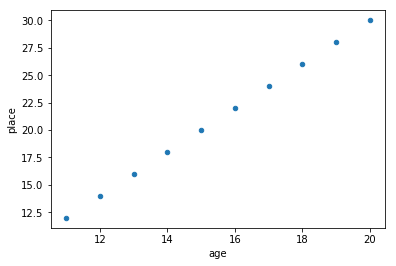

In [58]:
excel = pd.read_excel('data_excel.xlsx', sheet_name = 'Sheet2')
p1 = excel.plot(kind = 'scatter', x = 'age', y='place').get_figure()
p1.show()

In [60]:
p1.savefig('1.jpg')

In [62]:
dates = pd.date_range('20200101', periods = 6)
df = pd.DataFrame(np.random.rand(6,4), index = dates, columns = list('ABCD'))
print(df)

                   A         B         C         D
2020-01-01  0.331693  0.730231  0.522533  0.506629
2020-01-02  0.384612  0.920134  0.035348  0.226639
2020-01-03  0.522564  0.772092  0.402524  0.140578
2020-01-04  0.899686  0.029230  0.320010  0.662272
2020-01-05  0.902363  0.045196  0.213136  0.500176
2020-01-06  0.992730  0.645291  0.528021  0.855118


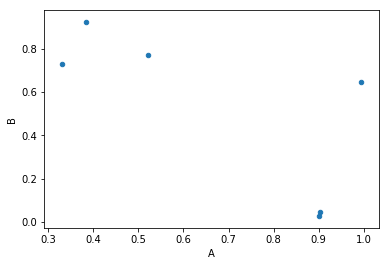

In [63]:
pl = df.plot(kind = 'scatter', x = 'A', y='B').get_figure()